# Lab 1: Introduction to OpenCV and Histogram Processing

For 18-793 Image and Video Processing course. By Sarun Gulyanon.

This notebook demonstrates various image processing techniques using OpenCV. We will cover the following topics:

1. **Import Required Libraries**
2. **Opening and Displaying an Image**
3. **Histogram Equalization**
4. **Histogram Matching**


## Import Required Libraries


These are the libraries required for this lab:
* **`cv2`**: OpenCV library for image processing.
* **`numpy`**: Library for numerical operations.
* **`matplotlib.pyplot`**: Library for plotting images.
* **`skimage.exposure`**: Module from scikit-image for exposure adjustments.

To install OpenCV, you can use the following `pip` command:

```bash
pip install opencv-python
```

If you also need the additional functionalities provided by the `opencv-contrib-python` package, you can install it using:

```bash
pip install opencv-contrib-python
```

Otherwise, when you import `opencv`, you will get `ImportError: DLL load failed while importing cv2: The specified module could not be found`.


To install `scikit-image`, you can use the following `pip` command:

```bash
pip install scikit-image
```

Then, import the necessary libraries, including OpenCV and NumPy.

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage import exposure
from skimage.exposure import match_histograms

## Open and Display Image
Use OpenCV to read an image from file.

In [15]:
# Read the image from file
image = cv2.imread('img\pout.tif')

Display it using OpenCV's imshow() function.

In [16]:
# Display the image using OpenCV's imshow() function
cv2.imshow('Original Image', image)
cv2.waitKey(0)  # Wait for a key press to close the window
cv2.destroyAllWindows()  # Close the window

Or you can display using Matplotlib's imshow() function as well.

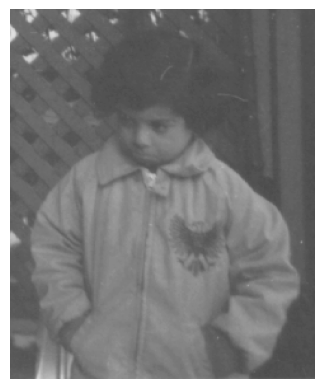

In [17]:
plt.figure()
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

We will use Matplotlib since it integrates nicely with the Jupyter notebook.

## Histogram Equalization
First, for simplicity, convert the image to grayscale.

In [18]:
# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

Apply histogram equalization to enhance the contrast.

In [19]:
# Apply histogram equalization
equalized_image = cv2.equalizeHist(gray_image)

Plot both original and the histogram equalized image next to each other for comparison.

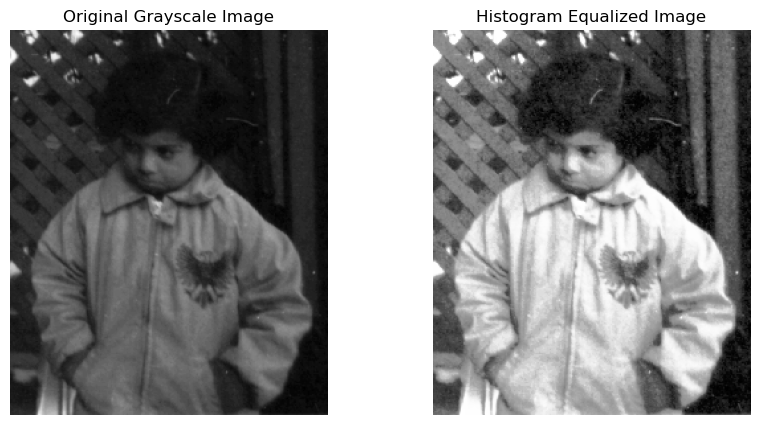

In [20]:
# Plot the original grayscale and histogram equalized images using matplotlib for comparison
plt.figure(figsize=(10, 5))

# Original grayscale image
plt.subplot(1, 2, 1)
plt.title('Original Grayscale Image')
plt.imshow(gray_image, cmap='gray')
plt.axis('off')

# Histogram equalized image
plt.subplot(1, 2, 2)
plt.title('Histogram Equalized Image')
plt.imshow(equalized_image, cmap='gray')
plt.axis('off')

plt.show()

You should notice that the histogram of the histogram equalized image has broader range of intensity.

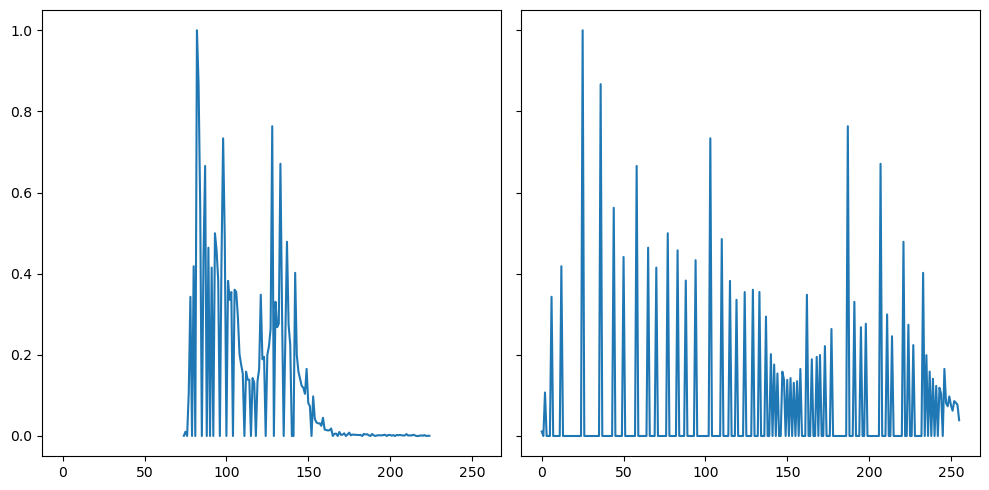

In [69]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)

for i, (img, title) in enumerate(zip([gray_image, equalized_image], ['Image', 'Equalized'])):
    # Plot histogram
    img_hist, bins = exposure.histogram(img)
    axes[i].plot(bins, img_hist / img_hist.max())

plt.tight_layout()
plt.show()

## Histogram Matching
First, get the image we want to do histogram matching and reference image. Here we will use the images given by the library.

In [63]:
reference = cv2.cvtColor(data.coffee(), cv2.COLOR_BGR2GRAY)
image = cv2.cvtColor(data.chelsea(), cv2.COLOR_BGR2GRAY)

Perform histogram matching to match the histogram of the image to a reference histogram.

In [64]:
matched = match_histograms(image, reference)

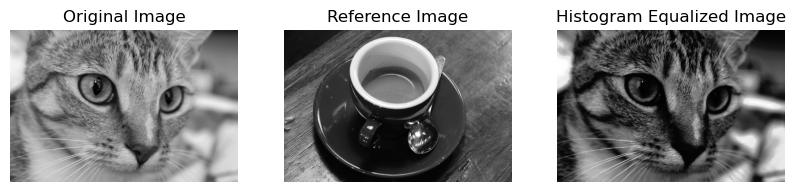

In [ ]:
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

# Reference image
plt.subplot(1, 3, 2)
plt.title('Reference Image')
plt.imshow(reference, cmap='gray')
plt.axis('off')

# Histogram equalized image
plt.subplot(1, 3, 3)
plt.title('Histogram Matched Image')
plt.imshow(matched, cmap='gray')
plt.axis('off')

plt.show()

You should see that now the cumulative distribution of the histogram of the histogram matched image is similar to the one of the reference image.

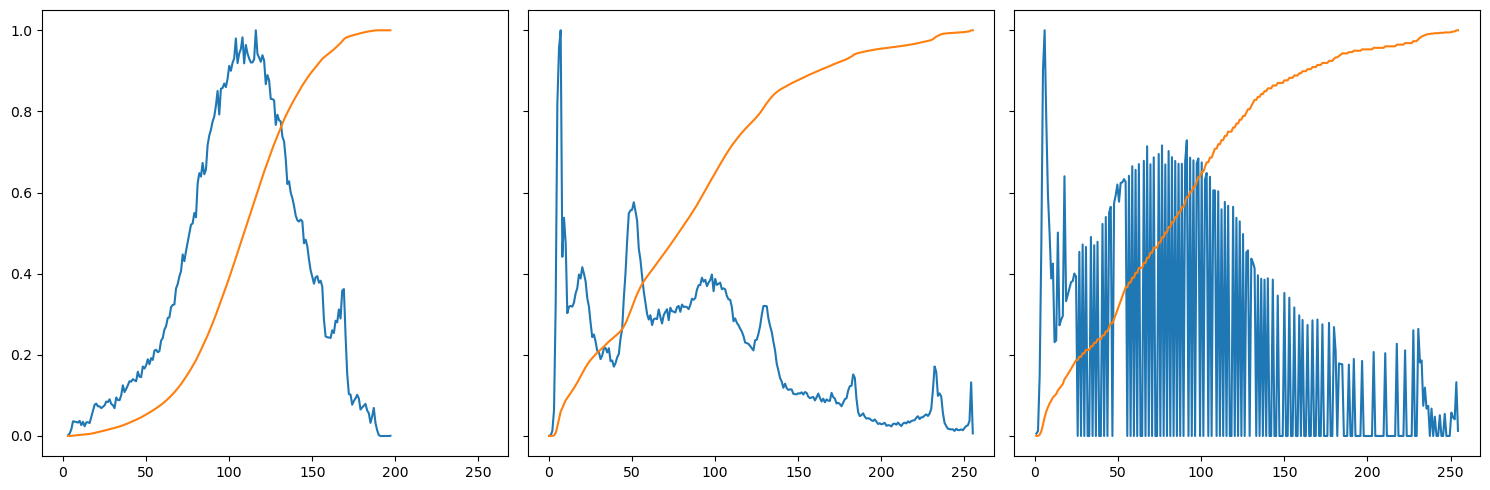

In [66]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)

for i, (img, title) in enumerate(zip([image, reference, matched], ['Image', 'Reference', 'Matched'])):
    # Plot histogram
    img_hist, bins = exposure.histogram(img)
    axes[i].plot(bins, img_hist / img_hist.max())
    img_cdf, bins = exposure.cumulative_distribution(img)
    axes[i].plot(bins, img_cdf)

plt.tight_layout()
plt.show()

----